In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [2]:
df_telechurn = pd.read_csv("telecom_churn_data.csv",encoding = "ISO-8859-1")
df_telechurn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
df_telechurn.shape

(99999, 226)

In [4]:
df_telechurn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
df_telechurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
#Find all columns with recharge info since total recharge amount is to be used for High Value Customer
total_rech_cols = [col for col in df_telechurn.columns if 'total_rech_' in col]
print(total_rech_cols)


['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


In [7]:
#Lets Derive Total "Data Recharge" Amounts for each month. its going to be used to find top 2o% high valued customers.

df_telechurn["total_rech_data_amt_6"] = df_telechurn["total_rech_data_6"] * df_telechurn["av_rech_amt_data_6"]
df_telechurn["total_rech_data_amt_7"] = df_telechurn["total_rech_data_7"] * df_telechurn["av_rech_amt_data_7"]
df_telechurn["total_rech_data_amt_8"] = df_telechurn["total_rech_data_8"] * df_telechurn["av_rech_amt_data_8"]

# Remove this column if not in use
df_telechurn["total_rech_data_amt_9"] = df_telechurn["total_rech_data_9"] * df_telechurn["av_rech_amt_data_9"]


In [8]:
# As we have already derived total recharge data for all months, its better to remove columns which we have used to calculate above derived columns.

col_to_drop = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9','av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
df_telechurn.drop(col_to_drop, axis=1,inplace=True)

In [9]:
df_telechurn.shape

(99999, 222)

In [10]:
# Now lets filter out High Value customers from good phase using "Average recharge amount" of 6th and 7th month. 

av_total_rech_amt_6_7 = (df_telechurn['total_rech_amt_6'].fillna(0) + df_telechurn['total_rech_data_amt_6'].fillna(0) + 
                   df_telechurn['total_rech_amt_7'].fillna(0) + df_telechurn['total_rech_data_amt_7'].fillna(0))/2
                   
# 70th percentile of the "average recharge amount"
percentile_70th_av_total_rech_amt_6_7 = np.percentile(av_total_rech_amt_6_7,70)
print("70th percentile of the average recharge amount for first two months :-",percentile_70th_av_total_rech_amt_6_7)                   

70th percentile of the average recharge amount for first two months :- 478.0


In [11]:
# Condition to filter out high valued customers who have recharged with an amount more than or equal to 
# "percentile_70th_av_total_rech_amt_6_7 = 478.0"

df_high_value_customer = df_telechurn[av_total_rech_amt_6_7 >= percentile_70th_av_total_rech_amt_6_7]


In [12]:
df_high_value_customer.shape

(30001, 222)

### Data Cleaning & EDA

In [13]:
#df_high_value_customer[df_high_value_customer[df_high_value_customer.columns[1:60]].var() > 0]

In [14]:
# Lets find columns where unique value is 1 and drop them as these columns have variance 0 and not going to add any information
# to analysis
single_valued_col = df_high_value_customer.loc[:,df_high_value_customer.apply(pd.Series.nunique)==1]
single_valued_col.head(15)

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# we have total 16 columns which have no variance
single_valued_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 16 columns):
circle_id               30001 non-null int64
loc_og_t2o_mou          29777 non-null float64
std_og_t2o_mou          29777 non-null float64
loc_ic_t2o_mou          29777 non-null float64
last_date_of_month_6    30001 non-null object
last_date_of_month_7    29974 non-null object
last_date_of_month_8    29836 non-null object
last_date_of_month_9    29636 non-null object
std_og_t2c_mou_6        29456 non-null float64
std_og_t2c_mou_7        29464 non-null float64
std_og_t2c_mou_8        28827 non-null float64
std_og_t2c_mou_9        28100 non-null float64
std_ic_t2o_mou_6        29456 non-null float64
std_ic_t2o_mou_7        29464 non-null float64
std_ic_t2o_mou_8        28827 non-null float64
std_ic_t2o_mou_9        28100 non-null float64
dtypes: float64(11), int64(1), object(4)
memory usage: 3.9+ MB


In [16]:
df_high_value_customer = df_high_value_customer.drop(list(single_valued_col),axis=1)
df_high_value_customer.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,...,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,...,NaN,802,57.74,19.38,18.74,0.00,NaN,NaN,NaN,NaN
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,NaN,315,21.03,910.65,122.16,0.00,NaN,354.0,207.0,NaN
21,7002124215,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,...,NaN,720,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
23,7000887461,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,...,1.0,604,40.45,51.86,0.00,0.00,NaN,712.0,540.0,252.0


In [17]:
df_high_value_customer.shape

(30001, 206)

In [18]:
# Rename Column names
print(df_high_value_customer.columns)

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       ...
       'fb_user_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'total_rech_data_amt_6', 'total_rech_data_amt_7',
       'total_rech_data_amt_8', 'total_rech_data_amt_9'],
      dtype='object', length=206)


In [19]:
df_high_value_customer.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [20]:
# check columns which are object types
col_object_type = df_high_value_customer.select_dtypes(include=['object'])
print(col_object_type.iloc[0])

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object


In [21]:
# As its clearly visible that above columns can be converted into datetime format so lets change it to datetime

for col in col_object_type:
    df_high_value_customer[col] = pd.to_datetime(df_high_value_customer[col])

df_high_value_customer.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,fb_user_9,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vbc_3g_9,total_rech_data_amt_6,total_rech_data_amt_7,total_rech_data_amt_8,total_rech_data_amt_9
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,...,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,NaN
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,...,NaN,802,57.74,19.38,18.74,0.00,NaN,NaN,NaN,NaN
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,NaN,315,21.03,910.65,122.16,0.00,NaN,354.0,207.0,NaN
21,7002124215,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,...,NaN,720,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
23,7000887461,74.350,193.897,366.966,811.480,48.96,50.66,33.58,15.74,85.41,...,1.0,604,40.45,51.86,0.00,0.00,NaN,712.0,540.0,252.0


In [22]:
df_high_value_customer.shape

(30001, 206)

In [23]:
#### Find churners

In [24]:
# Tag churners and remove attributes of the churn phase
df_high_value_customer['total_ic_mou_9'] = df_high_value_customer['total_ic_mou_9'].fillna(0)
df_high_value_customer['total_og_mou_9'] = df_high_value_customer['total_og_mou_9'].fillna(0)
df_high_value_customer['vol_2g_mb_9'] = df_high_value_customer['vol_2g_mb_9'].fillna(0)
df_high_value_customer['vol_3g_mb_9'] = df_high_value_customer['vol_3g_mb_9'].fillna(0)

churners_fields = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']

df_high_value_customer[churners_fields].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [25]:
df_high_value_customer['churn'] = np.where(df_high_value_customer[churners_fields].sum(axis=1)==0,1,0)

In [26]:
df_high_value_customer['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [27]:
# Find and remove all the attributes corresponding to the churn phase having "_9" in their names

In [28]:
drop_cols_9 = [col for col in df_high_value_customer.columns if "_9" in col]
drop_cols_9

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'arpu_2g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9',
 'total_rech_data_amt_9']

In [29]:
df_high_value_customer.drop(drop_cols_9 ,axis=1,inplace=True)

In [30]:
df_high_value_customer.shape

(30001, 156)

#### Column-wise: MISSING VALUES

In [31]:
# dropping all columns having missing values more than 30% 
columns = df_high_value_customer.columns.values
missing_percent = round(df_high_value_customer[df_high_value_customer.columns].isnull().sum()/len(df_high_value_customer.index),2)*100
df_missing_value = missing_percent.to_frame()
df_missing_value = df_missing_value.rename(columns= {0: 'perc'})
df_missing_value.index.name = 'columns'
df_missing_value

,perc
columns,
mobile_number,0.0
arpu_6,0.0
arpu_7,0.0
arpu_8,0.0
onnet_mou_6,2.0
onnet_mou_7,2.0
onnet_mou_8,4.0
offnet_mou_6,2.0
offnet_mou_7,2.0


In [32]:
columns_to_drop = df_missing_value[df_missing_value["perc"] > 30]
columns_to_drop

,perc
columns,
date_of_last_rech_data_6,44.0
date_of_last_rech_data_7,43.0
date_of_last_rech_data_8,47.0
max_rech_data_6,44.0
max_rech_data_7,43.0
max_rech_data_8,47.0
count_rech_2g_6,44.0
count_rech_2g_7,43.0
count_rech_2g_8,47.0


In [33]:
print(columns_to_drop.index)

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'total_rech_data_amt_6', 'total_rech_data_amt_7',
       'total_rech_data_amt_8'],
      dtype='object', name='columns')


df_high_value_customer.columns.values

In [34]:
df_high_value_customer.drop(columns_to_drop.index.values, axis=1, inplace=True)

In [35]:
df_high_value_customer.shape

(30001, 129)

In [36]:
### Row-wise: - missing value

In [37]:
# Now lets find row percentage of missing values for each columns and handle it
# There are total 82 columns which have missing values
columns_with_null_value = df_missing_value[(df_missing_value["perc"] > 0) & (df_missing_value["perc"] < 30)]
columns_with_null_value

,perc
columns,
onnet_mou_6,2.0
onnet_mou_7,2.0
onnet_mou_8,4.0
offnet_mou_6,2.0
offnet_mou_7,2.0
offnet_mou_8,4.0
roam_ic_mou_6,2.0
roam_ic_mou_7,2.0
roam_ic_mou_8,4.0


In [38]:
# the values are either amount or minutes so we can fill NA values with zero for all the columns
# Here we are considering that the customer has not used that service for a given month.
df_high_value_customer.fillna(value=0, inplace=True)

In [39]:
# Percentage of missing values (column-wise)
round(df_high_value_customer[df_high_value_customer.columns].isnull().sum()/len(df_high_value_customer.index),2)*100

mobile_number          0.0
arpu_6                 0.0
arpu_7                 0.0
arpu_8                 0.0
onnet_mou_6            0.0
onnet_mou_7            0.0
onnet_mou_8            0.0
offnet_mou_6           0.0
offnet_mou_7           0.0
offnet_mou_8           0.0
roam_ic_mou_6          0.0
roam_ic_mou_7          0.0
roam_ic_mou_8          0.0
roam_og_mou_6          0.0
roam_og_mou_7          0.0
roam_og_mou_8          0.0
loc_og_t2t_mou_6       0.0
loc_og_t2t_mou_7       0.0
loc_og_t2t_mou_8       0.0
loc_og_t2m_mou_6       0.0
loc_og_t2m_mou_7       0.0
loc_og_t2m_mou_8       0.0
loc_og_t2f_mou_6       0.0
loc_og_t2f_mou_7       0.0
loc_og_t2f_mou_8       0.0
loc_og_t2c_mou_6       0.0
loc_og_t2c_mou_7       0.0
loc_og_t2c_mou_8       0.0
loc_og_mou_6           0.0
loc_og_mou_7           0.0
                      ... 
max_rech_amt_8         0.0
date_of_last_rech_6    0.0
date_of_last_rech_7    0.0
date_of_last_rech_8    0.0
last_day_rch_amt_6     0.0
last_day_rch_amt_7     0.0
l

In [40]:
# **Derive new features** 
# since we are working over a four-month window, the first two months are the ‘good’ phase, 
# the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase

# lets Create Columns with Average of 6th & 7th Month Since it's a "Good" Phase.  
# and Keep the 8th month untouched as it's "Action" Phase

col_list = df_high_value_customer.filter(regex = "_6|_7").columns.str[:-2]
print(col_list.unique())

Index(['arpu', 'onnet_mou', 'offnet_mou', 'roam_ic_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2m_mou', 'std_og_t2f_mou',
       'std_og_mou', 'isd_og_mou', 'spl_og_mou', 'og_others', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2f_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2f_mou', 'std_ic_mou',
       'total_ic_mou', 'spl_ic_mou', 'isd_ic_mou', 'ic_others',
       'total_rech_num', 'total_rech_amt', 'max_rech_amt', 'date_of_last_rech',
       'last_day_rch_amt', 'vol_2g_mb', 'vol_3g_mb', 'monthly_2g', 'sachet_2g',
       'monthly_3g', 'sachet_3g', 'vbc_3g'],
      dtype='object')


In [41]:
# calculate average of first two months that is 6th and 7th month


# find unique columns which can be used to calculate average
#cols_to_drop =""
#for idx,col in enumerate(col_list.unique()):
#    cols_to_drop += "'"+col+"_6',"+"'"+col+"_7',"    


#print(cols_to_drop)

In [42]:
# following columns can be used to find average for 6th and 7th months 

col_list = ['arpu','onnet_mou','offnet_mou','roam_ic_mou','roam_og_mou','loc_og_t2t_mou',
            'loc_og_t2m_mou','loc_og_t2f_mou','loc_og_t2c_mou','loc_og_mou','std_og_t2t_mou',
            'std_og_t2m_mou','std_og_t2f_mou','std_og_mou','isd_og_mou','spl_og_mou','og_others',
            'total_og_mou','loc_ic_t2t_mou','loc_ic_t2m_mou','loc_ic_t2f_mou','loc_ic_mou','std_ic_t2t_mou',
            'std_ic_t2m_mou','std_ic_t2f_mou','std_ic_mou','total_ic_mou','spl_ic_mou','isd_ic_mou','ic_others',
            'total_rech_num','total_rech_amt','max_rech_amt','last_day_rch_amt','vol_2g_mb',
            'vol_3g_mb','monthly_2g','sachet_2g','monthly_3g','sachet_3g','vbc_3g']

In [43]:
# calculate average and create new columns

cols_to_drop =""

for idx,col in enumerate(col_list):
    new_col_name = "avg_"+col+"_67"
    old_col_6 = col+"_6"    
    old_col_7 = col+"_7"
    cols_to_drop += "'"+ old_col_6 +"',"+"'"+ old_col_7 +"',"
    df_high_value_customer[new_col_name] = (df_high_value_customer[old_col_6] + df_high_value_customer[old_col_7])/2

In [44]:
df_high_value_customer.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_monthly_2g_67,avg_sachet_2g_67,avg_monthly_3g_67,avg_sachet_3g_67,avg_vbc_3g_67
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,...,307.0,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,1185.0,1185.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,519.0,122.0,25.0,178.000,375.475,0.5,0.5,0.0,0.0,516.405
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,640.0,50.0,25.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,227.0,89.5,89.5,0.240,299.545,0.0,0.0,1.0,0.0,25.930


In [45]:
print(cols_to_drop)

'arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7','roam_ic_mou_6','roam_ic_mou_7','roam_og_mou_6','roam_og_mou_7','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_mou_6','loc_og_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_mou_6','std_og_mou_7','isd_og_mou_6','isd_og_mou_7','spl_og_mou_6','spl_og_mou_7','og_others_6','og_others_7','total_og_mou_6','total_og_mou_7','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_mou_6','loc_ic_mou_7','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_mou_6','std_ic_mou_7','total_ic_mou_6','total_ic_mou_7','spl_ic_mou_6','spl_ic_mou_7','isd_ic_mou_6','isd_ic_mou_7','ic_others_6','ic_others_7','t

In [46]:
# Let's drop col_list columns from the df_high_value_customer as they are no longer needed

#cols_to_drop = ['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7','roam_ic_mou_6',
#                'roam_ic_mou_7','roam_og_mou_6','roam_og_mou_7','loc_og_t2t_mou_6','loc_og_t2t_mou_7',
#                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2c_mou_6',
#                'loc_og_t2c_mou_7','loc_og_mou_6','loc_og_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_7',
#                'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_mou_6',
#                'std_og_mou_7','isd_og_mou_6','isd_og_mou_7','spl_og_mou_6','spl_og_mou_7','og_others_6',
#                'og_others_7','total_og_mou_6','total_og_mou_7','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7',
#                'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_mou_6',
#                'loc_ic_mou_7','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2m_mou_6','std_ic_t2m_mou_7',
#                'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_mou_6','std_ic_mou_7','total_ic_mou_6',
#                'total_ic_mou_7','spl_ic_mou_6','spl_ic_mou_7','isd_ic_mou_6','isd_ic_mou_7','ic_others_6',
#                'ic_others_7','total_rech_num_6','total_rech_num_7','total_rech_amt_6','total_rech_amt_7',
#                'max_rech_amt_6','max_rech_amt_7','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
#                'last_day_rch_amt_6','last_day_rch_amt_7','vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6',
#                'vol_3g_mb_7','monthly_2g_6','monthly_2g_7','sachet_2g_6','sachet_2g_7','monthly_3g_6',
#                'monthly_3g_7','sachet_3g_6','sachet_3g_7','vbc_3g_6','vbc_3g_7','mobile_number']

cols_to_drop = ['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7','roam_ic_mou_6','roam_ic_mou_7',
                'roam_og_mou_6','roam_og_mou_7','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
                'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_mou_6','loc_og_mou_7',
                'std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2f_mou_6',
                'std_og_t2f_mou_7','std_og_mou_6','std_og_mou_7','isd_og_mou_6','isd_og_mou_7','spl_og_mou_6','spl_og_mou_7',
                'og_others_6','og_others_7','total_og_mou_6','total_og_mou_7','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7',
                'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_mou_6','loc_ic_mou_7',
                'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2f_mou_6',
                'std_ic_t2f_mou_7','std_ic_mou_6','std_ic_mou_7','total_ic_mou_6','total_ic_mou_7','spl_ic_mou_6','spl_ic_mou_7',
                'isd_ic_mou_6','isd_ic_mou_7','ic_others_6','ic_others_7','total_rech_num_6','total_rech_num_7',
                'total_rech_amt_6','total_rech_amt_7','max_rech_amt_6','max_rech_amt_7','last_day_rch_amt_6',
                'last_day_rch_amt_7','vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7','monthly_2g_6','monthly_2g_7',
                'sachet_2g_6','sachet_2g_7','monthly_3g_6','monthly_3g_7','sachet_3g_6','sachet_3g_7','vbc_3g_6','vbc_3g_7',
                'mobile_number', 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']

df_high_value_customer.drop(cols_to_drop,axis=1,inplace=True)
df_high_value_customer.shape



(30001, 84)

In [47]:
# convert AON in Months for easy understanding and calculation
df_high_value_customer['aon_mon'] = round(df_high_value_customer['aon']/30,2)
df_high_value_customer.drop('aon', axis=1, inplace=True)

Text(0.5,1,'Churn Distribution')

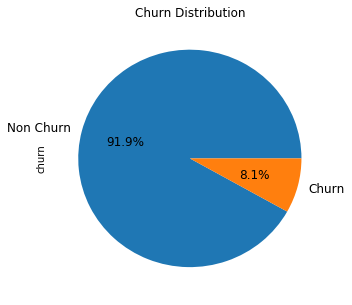

In [48]:
#Churn Distribution
ax = (df_high_value_customer['churn'].value_counts()*100.0 /len(df_high_value_customer)).plot.pie(autopct='%.1f%%', labels = ['Non Churn', 'Churn'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_title('Churn Distribution', fontsize = 12)



In [49]:
df_high_value_customer['churn'].value_counts()

0    27560
1     2441
Name: churn, dtype: int64

##### we have only 8.1% churn and 91.9% non churn data in training set which is imbalance and risky to use in models for prediction. We have to use balancing techniques to balance the training set.

In [50]:
#aon_plot = sns.distplot( df_high_value_customer["aon_mon"], hist=True, kde=False, rug=False,hist_kws={'edgecolor':'black'})
#aon_plot.set_ylabel("No of Customers")
#aon_plot.set_xlabel("Tenure (in months)")
#aon_plot.set_title("Customers distribution based on their Tenure")


In [51]:
df_high_value_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 84 columns):
arpu_8                     30001 non-null float64
onnet_mou_8                30001 non-null float64
offnet_mou_8               30001 non-null float64
roam_ic_mou_8              30001 non-null float64
roam_og_mou_8              30001 non-null float64
loc_og_t2t_mou_8           30001 non-null float64
loc_og_t2m_mou_8           30001 non-null float64
loc_og_t2f_mou_8           30001 non-null float64
loc_og_t2c_mou_8           30001 non-null float64
loc_og_mou_8               30001 non-null float64
std_og_t2t_mou_8           30001 non-null float64
std_og_t2m_mou_8           30001 non-null float64
std_og_t2f_mou_8           30001 non-null float64
std_og_mou_8               30001 non-null float64
isd_og_mou_8               30001 non-null float64
spl_og_mou_8               30001 non-null float64
og_others_8                30001 non-null float64
total_og_mou_8             30001 non-null

In [52]:
#### Outliners Assessment

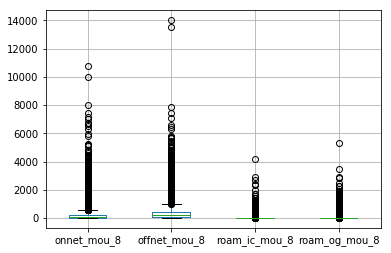

In [53]:
boxplot = df_high_value_customer[df_high_value_customer.columns[1:5]].boxplot()

In [54]:
vol_3g_mb_8 = df_high_value_customer["vol_3g_mb_8"].quantile(0.99)
avg_arpu_67high = df_high_value_customer["avg_arpu_67"].quantile(0.99)
avg_arpu_67_low = df_high_value_customer["avg_arpu_67"].quantile(0.01)
total_rech_amt_8 = df_high_value_customer["total_rech_amt_8"].quantile(0.99)
avg_isd_og_mou_67 = df_high_value_customer["avg_isd_og_mou_67"].quantile(0.99)
avg_spl_ic_mou_67 = df_high_value_customer["avg_spl_ic_mou_67"].quantile(0.99)
onnet_mou_8 = df_high_value_customer["onnet_mou_8"].quantile(0.99)
std_ic_t2m_mou_8 = df_high_value_customer["std_ic_t2m_mou_8"].quantile(0.99)
isd_ic_mou_8 = df_high_value_customer["isd_ic_mou_8"].quantile(0.99)
ic_others_8 = df_high_value_customer["ic_others_8"].quantile(0.99)
og_others_8 = df_high_value_customer["og_others_8"].quantile(0.995)
sachet_3g_8 = df_high_value_customer["sachet_3g_8"].quantile(0.995)
avg_roam_ic_mou_67 = df_high_value_customer["avg_roam_ic_mou_67"].quantile(0.995)
vol_2g_mb_8 = df_high_value_customer["vol_2g_mb_8"].quantile(0.995)
avg_isd_ic_mou_67 = df_high_value_customer["avg_isd_ic_mou_67"].quantile(0.995)
avg_std_ic_t2t_mou_67 = df_high_value_customer["avg_std_ic_t2t_mou_67"].quantile(0.995)
std_ic_t2f_mou_8 = df_high_value_customer["std_ic_t2f_mou_8"].quantile(0.995)
avg_loc_og_t2c_mou_67 = df_high_value_customer["avg_loc_og_t2c_mou_67"].quantile(0.995)
avg_og_others_67 = df_high_value_customer["avg_og_others_67"].quantile(0.995)
avg_std_ic_t2f_mou_67 = df_high_value_customer["avg_std_ic_t2f_mou_67"].quantile(0.995)


df_high_value_customer = df_high_value_customer[df_high_value_customer["vol_3g_mb_8"] < vol_3g_mb_8]
df_high_value_customer = df_high_value_customer[df_high_value_customer["avg_arpu_67"] < avg_arpu_67high]
df_high_value_customer = df_high_value_customer[df_high_value_customer["avg_arpu_67"] > avg_arpu_67_low]
df_high_value_customer = df_high_value_customer[df_high_value_customer["total_rech_amt_8"] < total_rech_amt_8]
df_high_value_customer = df_high_value_customer[df_high_value_customer["avg_isd_og_mou_67"] < avg_isd_og_mou_67]
df_high_value_customer = df_high_value_customer[df_high_value_customer["avg_spl_ic_mou_67"] < avg_spl_ic_mou_67]
df_high_value_customer = df_high_value_customer[df_high_value_customer["onnet_mou_8"] < onnet_mou_8]
df_high_value_customer = df_high_value_customer[df_high_value_customer["std_ic_t2m_mou_8"] < std_ic_t2m_mou_8]
df_high_value_customer = df_high_value_customer[df_high_value_customer["isd_ic_mou_8"] < isd_ic_mou_8]
df_high_value_customer = df_high_value_customer[df_high_value_customer["ic_others_8"] < ic_others_8]
df_high_value_customer = df_high_value_customer[df_high_value_customer["og_others_8"] < og_others_8]
df_high_value_customer = df_high_value_customer[df_high_value_customer["sachet_3g_8"] < sachet_3g_8]
df_high_value_customer = df_high_value_customer[df_high_value_customer["avg_roam_ic_mou_67"] < avg_roam_ic_mou_67]
df_high_value_customer = df_high_value_customer[df_high_value_customer["vol_2g_mb_8"] < vol_2g_mb_8]
df_high_value_customer = df_high_value_customer[df_high_value_customer["avg_isd_ic_mou_67"] < avg_isd_ic_mou_67]
df_high_value_customer = df_high_value_customer[df_high_value_customer["avg_std_ic_t2t_mou_67"] < avg_std_ic_t2t_mou_67]
df_high_value_customer = df_high_value_customer[df_high_value_customer["std_ic_t2f_mou_8"] < std_ic_t2f_mou_8]
df_high_value_customer = df_high_value_customer[df_high_value_customer["avg_loc_og_t2c_mou_67"] < avg_loc_og_t2c_mou_67]
df_high_value_customer = df_high_value_customer[df_high_value_customer["avg_og_others_67"] < avg_og_others_67]
df_high_value_customer = df_high_value_customer[df_high_value_customer["avg_std_ic_t2f_mou_67"] < avg_std_ic_t2f_mou_67]


In [55]:

df_high_value_customer.shape

(26404, 84)

In [56]:
df_high_value_customer[df_high_value_customer.columns[1:20]].describe(percentiles=[0.05,.25,.50,.75,.90,.95,.99,.995])

,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8
count,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000
mean,205.913812,317.652608,10.170664,17.151350,71.086904,148.424213,5.660801,1.483457,225.179772,128.272716,147.240710,1.363435,276.880117,0.284027,5.889915,0.000039,508.241219,61.344198,143.725578
std,340.409377,423.292393,53.631659,80.664533,159.385189,220.068719,19.007193,5.291663,310.142782,302.988391,356.647879,9.722518,502.144999,3.393992,17.131251,0.001913,577.909352,156.815713,206.320611
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.375000,45.575000,0.000000,0.000000,2.590000,13.380000,0.000000,0.000000,22.790000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.305000,4.910000,24.475000
50%,64.260000,178.090000,0.000000,0.000000,20.730000,67.760000,0.000000,0.000000,110.640000,0.450000,8.810000,0.000000,23.060000,0.000000,0.330000,0.000000,326.085000,22.580000,80.110000
75%,231.150000,425.122500,0.000000,0.000000,71.215000,195.922500,3.765000,0.000000,307.867500,73.590000,111.490000,0.000000,337.615000,0.000000,5.730000,0.000000,747.095000,64.210000,183.440000
90%,622.053000,787.556000,13.644000,26.487000,174.460000,392.354000,14.630000,4.230000,592.980000,444.030000,445.818000,1.030000,950.731000,0.000000,16.430000,0.000000,1273.215000,137.187000,346.230000
95%,969.080000,1115.949500,48.582500,93.110000,287.420500,557.077000,27.210000,8.698500,825.738500,813.624000,815.116500,5.058500,1356.401000,0.000000,27.224000,0.000000,1667.806500,217.999500,496.725500


In [57]:
df_high_value_customer[df_high_value_customer.columns[21:40]].describe(percentiles=[0.05,.25,.50,.75,.90,.95,.97,.99,.995])

,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8
count,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000
mean,219.365384,10.085938,19.369927,1.538493,30.997608,255.522015,0.025856,4.638918,0.487194,9.565823,528.886608,151.098546,86.947697,92.484406,285.952562,0.152060,1.035373,0.183192,0.138577
std,299.641994,41.017849,40.020697,5.763345,64.368191,315.312662,0.103644,18.716784,1.907000,8.591061,396.918620,140.585197,117.960732,232.828552,584.132583,0.396099,2.430498,0.511538,0.568923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.555000,0.000000,0.000000,0.000000,0.337500,59.710000,0.000000,0.000000,0.000000,4.000000,246.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,128.195000,0.030000,3.360000,0.000000,8.490000,165.635000,0.000000,0.000000,0.000000,7.000000,469.000000,130.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,282.000000,6.260000,19.730000,0.000000,34.140000,337.107500,0.000000,0.000000,0.000000,12.000000,737.000000,179.000000,130.000000,48.542500,328.497500,0.000000,1.000000,0.000000,0.000000
90%,526.004000,24.380000,55.380000,3.280000,84.160000,589.174000,0.000000,8.737000,0.860000,20.000000,1044.000000,252.000000,200.000000,305.689000,1017.369000,1.000000,4.000000,1.000000,0.000000
95%,735.397000,47.277000,93.160000,8.740000,136.252500,809.742000,0.250000,27.872500,2.627000,26.000000,1288.850000,398.000000,252.000000,583.104000,1520.859500,1.000000,6.000000,1.000000,1.000000


In [58]:
df_high_value_customer[df_high_value_customer.columns[41:60]].describe(percentiles=[0.01,0.05,.25,.50,.75,.90,.95,.97,.99,.995])

,churn,avg_arpu_67,avg_onnet_mou_67,avg_offnet_mou_67,avg_roam_ic_mou_67,avg_roam_og_mou_67,avg_loc_og_t2t_mou_67,avg_loc_og_t2m_mou_67,avg_loc_og_t2f_mou_67,avg_loc_og_t2c_mou_67,avg_loc_og_mou_67,avg_std_og_t2t_mou_67,avg_std_og_t2m_mou_67,avg_std_og_t2f_mou_67,avg_std_og_mou_67,avg_isd_og_mou_67,avg_spl_og_mou_67,avg_og_others_67,avg_total_og_mou_67
count,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.00000,26404.000000
mean,0.082374,523.516760,246.641090,363.551743,10.624920,20.029178,80.010539,161.448486,6.119338,1.402103,247.586683,158.715134,177.743326,1.524428,337.986558,0.341171,5.727223,0.27518,591.925167
std,0.274939,274.831579,372.785127,418.871799,36.583356,75.235466,178.598665,221.221655,18.389253,3.431836,320.340721,335.432633,364.160693,9.754515,520.965123,2.378847,12.879521,0.73463,571.956485
min,0.000000,83.929000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
1%,0.000000,108.171255,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
5%,0.000000,162.117475,0.000000,4.035750,0.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.740000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.033750
25%,0.000000,340.123000,20.995000,82.960000,0.000000,0.000000,6.770000,25.547500,0.000000,0.000000,41.595000,0.000000,0.490000,0.000000,1.783750,0.000000,0.000000,0.00000,144.541250
50%,0.000000,475.048250,91.217500,232.937500,0.000000,0.000000,27.242500,83.915000,0.640000,0.000000,133.805000,5.120000,21.780000,0.000000,56.985000,0.000000,1.645000,0.00000,450.272500
75%,0.000000,647.142500,299.451250,487.836250,1.376250,2.841250,79.081250,211.931250,4.605000,1.055000,333.306250,130.106250,171.692500,0.000000,526.658750,0.000000,6.705000,0.00000,867.996250
90%,0.000000,881.366800,732.393000,868.490500,24.770000,48.394500,184.324000,412.738500,15.494500,4.443500,617.803500,583.178500,576.495500,2.078500,1063.565500,0.000000,15.368500,0.99000,1333.279000


In [59]:
df_high_value_customer[df_high_value_customer.columns[61:80]].describe(percentiles=[0.05,.25,.50,.75,.90,.95,.97,.99,.995])

,avg_loc_ic_t2m_mou_67,avg_loc_ic_t2f_mou_67,avg_loc_ic_mou_67,avg_std_ic_t2t_mou_67,avg_std_ic_t2m_mou_67,avg_std_ic_t2f_mou_67,avg_std_ic_mou_67,avg_total_ic_mou_67,avg_spl_ic_mou_67,avg_isd_ic_mou_67,avg_ic_others_67,avg_total_rech_num_67,avg_total_rech_amt_67,avg_max_rech_amt_67,avg_last_day_rch_amt_67,avg_vol_2g_mb_67,avg_vol_3g_mb_67,avg_monthly_2g_67,avg_sachet_2g_67
count,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000,26404.000000
mean,149.874663,15.599466,230.932506,10.596038,23.617781,1.749457,35.966791,273.337220,0.033913,5.634229,0.762167,11.526587,617.672625,163.286529,96.662627,120.147554,312.639381,0.180503,1.139846
std,202.418432,44.663407,294.896337,26.688048,58.161219,5.852186,70.944991,312.042936,0.075828,22.998573,3.830547,8.190881,327.556643,130.247583,99.809910,267.952221,611.790809,0.386087,2.372195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,3.180750,0.000000,6.215000,0.000000,0.000000,0.000000,0.000000,11.695750,0.000000,0.000000,0.000000,3.500000,185.500000,35.500000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,35.135000,0.180000,57.528750,0.000000,0.670000,0.000000,2.390000,84.485000,0.000000,0.000000,0.000000,6.500000,402.000000,102.000000,30.000000,0.000000,0.000000,0.000000,0.000000
50%,88.625000,2.625000,141.035000,1.275000,6.620000,0.000000,13.550000,184.507500,0.000000,0.000000,0.000000,9.500000,558.500000,126.000000,76.000000,6.070000,0.000000,0.000000,0.000000
75%,188.935000,12.812500,294.960000,9.015000,24.153750,0.605000,40.310000,351.655000,0.000000,0.250000,0.185000,14.000000,762.125000,198.000000,123.000000,105.926250,428.842500,0.000000,1.000000
90%,345.755000,38.073500,530.713500,27.803500,58.962500,4.195000,90.877500,602.620500,0.145000,11.300000,1.460000,21.000000,1041.000000,265.500000,197.500000,390.092000,1027.178000,1.000000,4.000000
95%,493.659500,70.031750,738.359750,50.380000,97.308000,9.519250,145.535000,819.618500,0.220000,30.309250,3.679250,27.000000,1245.925000,400.000000,252.000000,631.270500,1479.436750,1.000000,6.000000


In [60]:
df_high_value_customer[df_high_value_customer.columns[81:90]].describe(percentiles=[0.05,.25,.50,.75,.90,.95,.97,.99,.995])

,avg_sachet_3g_67,avg_vbc_3g_67,aon_mon
count,26404.000000,26404.000000,26404.000000
mean,0.182605,156.174080,40.673193
std,0.688237,344.167239,32.030224
min,0.000000,0.000000,6.000000
5%,0.000000,0.000000,7.630000
25%,0.000000,0.000000,15.500000
50%,0.000000,0.000000,28.670000
75%,0.000000,151.671250,59.577500
90%,0.500000,540.609000,93.470000
95%,1.000000,840.926250,104.900000


Text(0.5,1,'Churn Distribution')

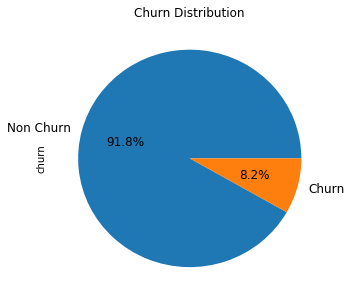

In [61]:
#Churn Distribution
ax = (df_high_value_customer['churn'].value_counts()*100.0 /len(df_high_value_customer)).plot.pie(autopct='%.1f%%', labels = ['Non Churn', 'Churn'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_title('Churn Distribution', fontsize = 12)


In [62]:
df_high_value_customer['churn'].value_counts()

0    24229
1     2175
Name: churn, dtype: int64

In [63]:
### Correlation of features

In [64]:
# Now lets take correlation matric to understand numeric variables relation with other variables.

In [65]:
df_high_value_customer_temp = df_high_value_customer.drop(['churn'], axis=1)
corr = df_high_value_customer_temp.corr().abs()
corr.style.background_gradient().set_precision(2)

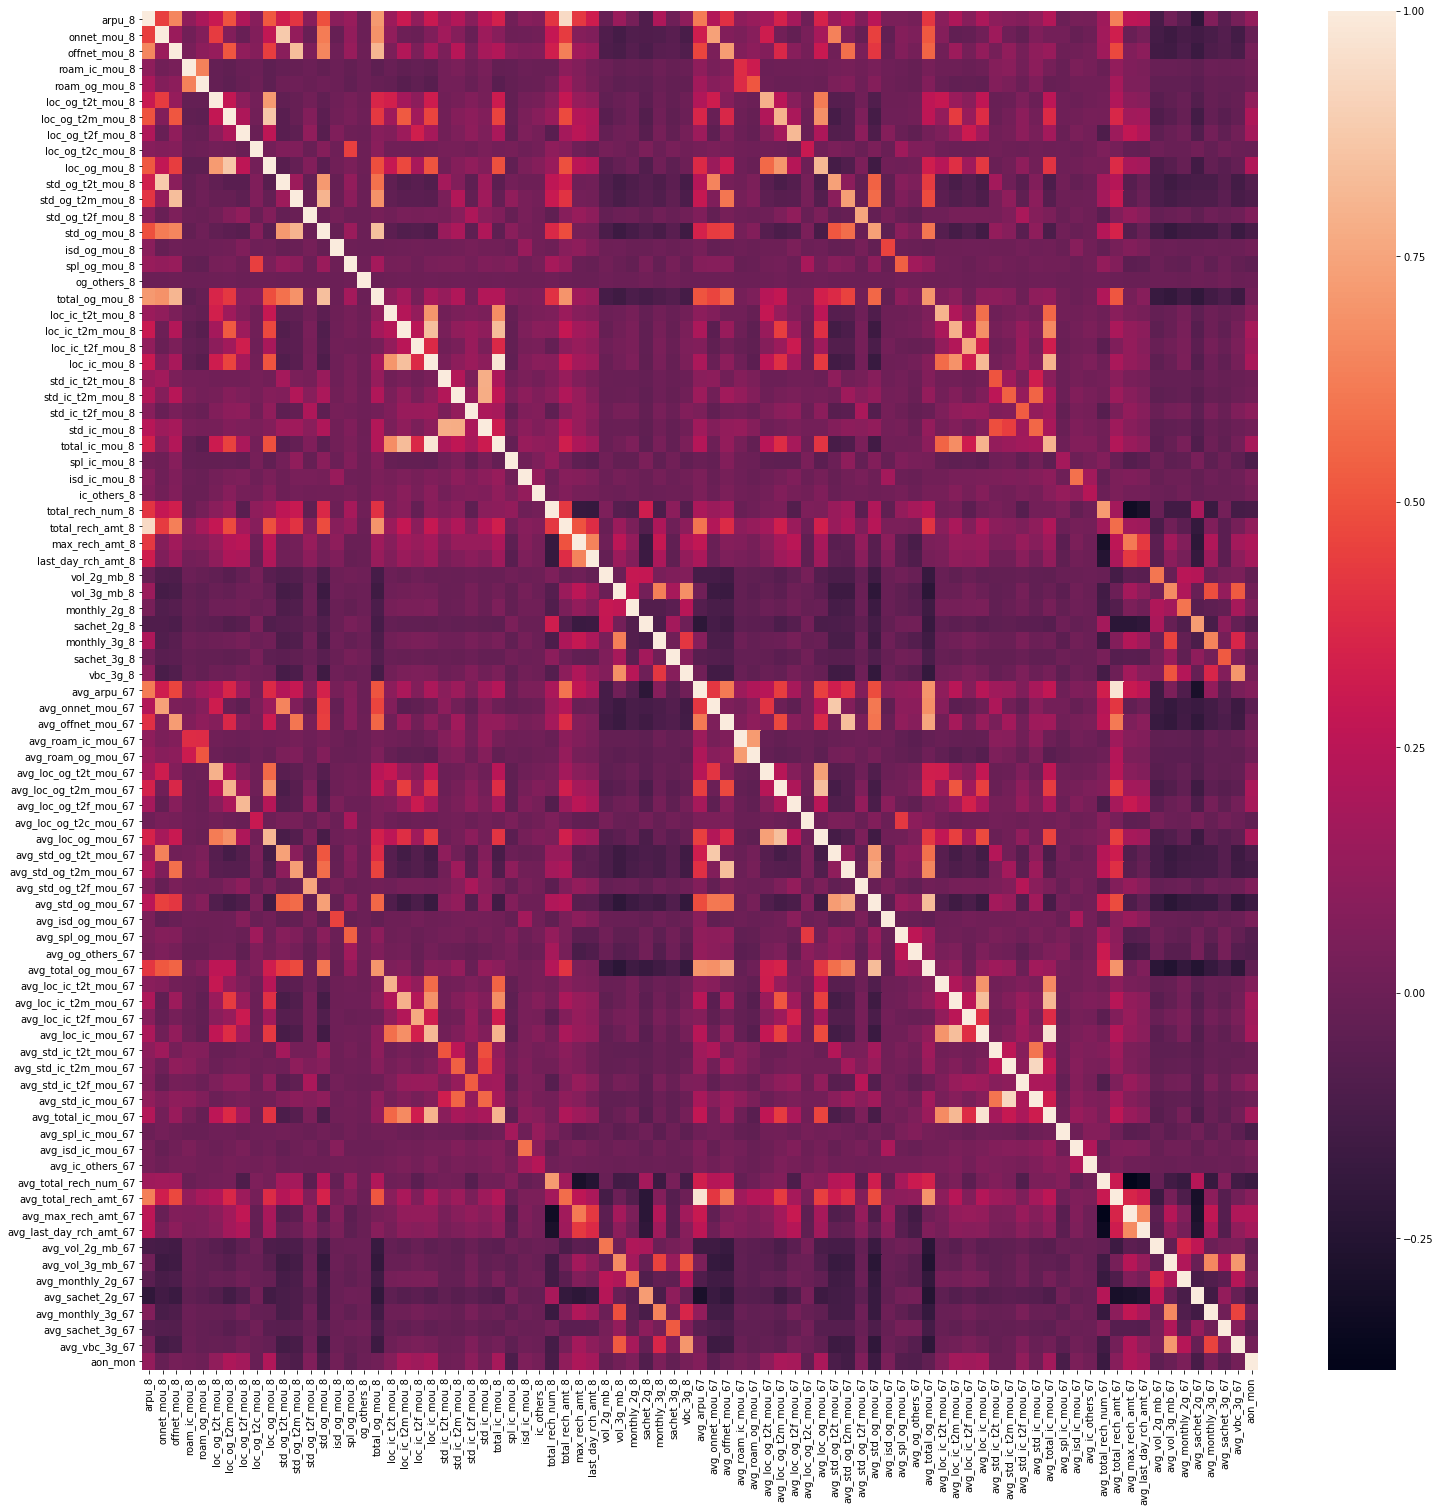

In [66]:
# Let's see the correlation matrix 

plt.figure(figsize = (25,25))
sns.heatmap(df_high_value_customer_temp.corr())
plt.show()

In [67]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
upper_high_corr_features = [column for column in upper.columns if any(upper[column] > 0.75)]

print("upper triangle high correlated columns", len(upper_high_corr_features))
print(upper_high_corr_features)

upper triangle high correlated columns 25
['loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'total_rech_amt_8', 'avg_loc_og_t2t_mou_67', 'avg_loc_og_t2m_mou_67', 'avg_loc_og_t2f_mou_67', 'avg_loc_og_mou_67', 'avg_std_og_t2t_mou_67', 'avg_std_og_t2m_mou_67', 'avg_std_og_t2f_mou_67', 'avg_std_og_mou_67', 'avg_total_og_mou_67', 'avg_loc_ic_t2t_mou_67', 'avg_loc_ic_t2m_mou_67', 'avg_loc_ic_t2f_mou_67', 'avg_loc_ic_mou_67', 'avg_std_ic_mou_67', 'avg_total_ic_mou_67', 'avg_total_rech_amt_67']


In [68]:
# As we can see there are a lot correlated columns.
# upper triangle high correlated columns = 25
#lower triangle high correlated columns = 83

In [69]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
upper_high_corr_features = [column for column in upper.columns if any(upper[column] > 0.85)]

print("upper triangle high correlated columns", len(upper_high_corr_features))
print(upper_high_corr_features)

upper triangle high correlated columns 8
['loc_og_mou_8', 'std_og_t2t_mou_8', 'total_ic_mou_8', 'total_rech_amt_8', 'avg_std_og_t2t_mou_67', 'avg_std_ic_mou_67', 'avg_total_ic_mou_67', 'avg_total_rech_amt_67']


In [70]:
# Lets remove columns which are highly correlated 
df_high_value_customer = df_high_value_customer.drop(upper_high_corr_features, axis=1)
df_high_value_customer.shape

(26404, 76)

### Model Building

In [71]:
#Lets Create New DF for Model Building

df = df_high_value_customer[:].copy()

In [72]:
X = df.drop(['churn'], axis=1)
Y = df['churn']

df.drop('churn', axis=1, inplace=True)

In [73]:
# Standard Scaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
X.shape

(26404, 75)

In [74]:
# Split in train & Test
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7, random_state=1)

In [76]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

Y_train_imb = (Y_train != 0).sum()/(Y_train == 0).sum()
Y_test_imb = (Y_test != 0).sum()/(Y_test == 0).sum()
print("Train Data Imbalance : ", Y_train_imb)
print("Test Data Imbalance : ", Y_test_imb)

X_train Shape :  (18482, 75)
X_test Shape :  (7922, 75)
Train Data Imbalance :  0.08826473532355886
Test Data Imbalance :  0.09329285122826388


### RFE

In [77]:
# Balancing DataSet for RFE
from imblearn.over_sampling import SMOTE

sm = SMOTE(kind = "regular")
X_tr,Y_tr = sm.fit_sample(X_train,Y_train)

In [78]:
# Feature reduction using RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

lr = LogisticRegression()

In [79]:
# Running RFE for 20 variables as output
rfe = RFE(lr,25)

In [80]:
rfe = rfe.fit(X_tr,Y_tr)

In [81]:
rfe.support_

array([False, False,  True, False, False, False, False,  True, False,
        True,  True, False, False,  True, False,  True,  True,  True,
       False,  True, False, False, False,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True])

In [82]:
rfe_features = list(df.columns[rfe.support_])
print("Features identified by RFE ", rfe_features)

Features identified by RFE  ['offnet_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'vbc_3g_8', 'avg_arpu_67', 'avg_offnet_mou_67', 'avg_loc_og_t2m_mou_67', 'avg_std_og_t2m_mou_67', 'avg_loc_ic_mou_67', 'avg_monthly_2g_67', 'aon_mon']


In [83]:
## Features identified by RFE  
X_rfe =pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
Y_rfe = Y_tr

In [84]:
import statsmodels.api as sm

In [85]:
# Logistic regression model 1
logm1 = sm.GLM(Y_rfe,(sm.add_constant(X_rfe)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                33966
Model:                            GLM   Df Residuals:                    33940
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12718.
Date:                Mon, 20 May 2019   Deviance:                       25436.
Time:                        22:44:50   Pearson chi2:                 5.34e+04
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0599      0.032    -65.039      0.000      -2.122      -1.998
2             -0.4613      0.084     -5.462      0.000      -0.627      -0.296
7             -0.3774      0.049     -7.779      0.000      -0.473      -0.282
9              0.4257      0.076      5.584      0.000       0.276       0.575
10            -0.3406      0.065     -5.264      0.000      -0.467      -0.214
13            -0.3027      0.035     -8.723      0.000      -0.371      -0.235
15            -0.6190      0.036    -17.058      0.000      -0.690      -0.548
16            -0.3705      0.173     -2.143      0.032      -0.709      -0.032
17            -0.4944      0.224     -2.208      0.027      -0.933      -0.056
19            -1.6131      0.302     -5.341      0.000      -2.205      -1.021
23            -0.3043      0.030    -10.155      0.000      -0.363      -0.246
24            -0.6784      0.041    -16.491      0.000      -0.759      -0.598
27            -0.4776      0.028    -16.950      0.000      -0.533      -0.422
29            -0.3881      0.020    -19.069      0.000      -0.428      -0.348
30            -0.3585      0.031    -11.560      0.000      -0.419      -0.298
31            -0.5239      0.031    -17.172      0.000      -0.584      -0.464
32            -0.2717      0.033     -8.219      0.000      -0.337      -0.207
33            -0.5334      0.033    -16.084      0.000      -0.598      -0.468
36            -0.4241      0.039    -10.864      0.000      -0.501      -0.348
37             0.5498      0.027     20.406      0.000       0.497       0.603
39             0.8726      0.141      6.169      0.000       0.595       1.150
43            -0.7389      0.073    -10.073      0.000      -0.883      -0.595
47            -0.7371      0.121     -6.086      0.000      -0.974      -0.500
57             0.8559      0.052     16.323      0.000       0.753       0.959
69            -0.2729      0.025    -10.851      0.000      -0.322      -0.224
74            -0.3156      0.020    -15.542      0.000      -0.355      -0.276
==============================================================================
"""

In [86]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
df_vif = pd.DataFrame(data=df).iloc[:, rfe.support_]
vif['Features'] = df_vif.columns
vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
19,avg_offnet_mou_67,136.33
8,loc_ic_mou_8,94.63
21,avg_std_og_t2m_mou_67,71.45
7,loc_ic_t2m_mou_8,46.42
20,avg_loc_og_t2m_mou_67,32.04
6,loc_ic_t2t_mou_8,20.32
0,offnet_mou_8,20.20
2,std_og_t2m_mou_8,12.02
18,avg_arpu_67,8.46
5,total_og_mou_8,6.85


In [88]:
#corr = df_vif.corr().abs()
#corr.style.background_gradient().set_precision(2)

In [89]:
# As we can see "loc_ic_mou_8" still has dependency on other variables.
# Lets remove it

#print(rfe_features)
position = 0;
for i in range(len(df.columns)): 
    if df.columns[i] == "loc_ic_mou_8":
        position = i
#print(position)
rfe_list = list(rfe.support_)
rfe_list[position] = False
#print(rfe_list)

X_rfe =pd.DataFrame(data=X_tr).iloc[:, rfe_list]
Y_rfe = Y_tr

# Logistic regression model 2
logm2 = sm.GLM(Y_rfe,(sm.add_constant(X_rfe)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                33966
Model:                            GLM   Df Residuals:                    33941
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12738.
Date:                Mon, 20 May 2019   Deviance:                       25476.
Time:                        22:44:51   Pearson chi2:                 5.37e+04
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0590      0.032    -65.059      0.000      -2.121      -1.997
2             -0.4604      0.084     -5.453      0.000      -0.626      -0.295
7             -0.4255      0.048     -8.794      0.000      -0.520      -0.331
9              0.4299      0.076      5.641      0.000       0.281       0.579
10            -0.3438      0.065     -5.311      0.000      -0.471      -0.217
13            -0.3026      0.035     -8.726      0.000      -0.371      -0.235
15            -0.6303      0.036    -17.383      0.000      -0.701      -0.559
16            -1.1914      0.074    -16.081      0.000      -1.337      -1.046
17            -1.6314      0.068    -23.900      0.000      -1.765      -1.498
23            -0.3089      0.030    -10.309      0.000      -0.368      -0.250
24            -0.6803      0.041    -16.518      0.000      -0.761      -0.600
27            -0.4769      0.028    -16.916      0.000      -0.532      -0.422
29            -0.3887      0.020    -19.101      0.000      -0.429      -0.349
30            -0.3633      0.031    -11.702      0.000      -0.424      -0.302
31            -0.5289      0.030    -17.345      0.000      -0.589      -0.469
32            -0.2725      0.033     -8.249      0.000      -0.337      -0.208
33            -0.5346      0.033    -16.124      0.000      -0.600      -0.470
36            -0.4318      0.039    -11.062      0.000      -0.508      -0.355
37             0.5596      0.027     20.795      0.000       0.507       0.612
39             0.8580      0.141      6.066      0.000       0.581       1.135
43            -0.7142      0.073     -9.758      0.000      -0.858      -0.571
47            -0.7249      0.121     -5.985      0.000      -0.962      -0.488
57             0.7783      0.050     15.563      0.000       0.680       0.876
69            -0.2722      0.025    -10.841      0.000      -0.321      -0.223
74            -0.3219      0.020    -15.908      0.000      -0.362      -0.282
==============================================================================
"""

In [90]:
vif = pd.DataFrame()
df_vif = pd.DataFrame(data=df).iloc[:, rfe_list]
vif['Features'] = df_vif.columns
vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,avg_offnet_mou_67,136.33
20,avg_std_og_t2m_mou_67,71.45
19,avg_loc_og_t2m_mou_67,32.02
0,offnet_mou_8,20.19
2,std_og_t2m_mou_8,12.02
17,avg_arpu_67,8.44
5,total_og_mou_8,6.85
21,avg_loc_ic_mou_67,5.40
7,loc_ic_t2m_mou_8,3.58
10,total_rech_num_8,3.43


In [91]:
# As we can see "offnet_mou_8" still has dependency on other variables.
# Lets remove it

#print(rfe_features)
position = 0;
for i in range(len(df.columns)): 
    if df.columns[i] == "offnet_mou_8":
        position = i
#print(position)
#rfe_list = list(rfe.support_)
rfe_list[position] = False
#print(rfe_list)

X_rfe =pd.DataFrame(data=X_tr).iloc[:, rfe_list]
Y_rfe = Y_tr

# Logistic regression model 3
logm3 = sm.GLM(Y_rfe,(sm.add_constant(X_rfe)), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                33966
Model:                            GLM   Df Residuals:                    33942
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12753.
Date:                Mon, 20 May 2019   Deviance:                       25506.
Time:                        22:44:52   Pearson chi2:                 5.55e+04
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0552      0.032    -64.940      0.000      -2.117      -1.993
7             -0.4594      0.049     -9.432      0.000      -0.555      -0.364
9              0.0711      0.038      1.863      0.062      -0.004       0.146
10            -0.3559      0.065     -5.470      0.000      -0.483      -0.228
13            -0.3003      0.034     -8.711      0.000      -0.368      -0.233
15            -0.6625      0.036    -18.434      0.000      -0.733      -0.592
16            -1.2271      0.074    -16.551      0.000      -1.372      -1.082
17            -1.7468      0.065    -26.709      0.000      -1.875      -1.619
23            -0.3021      0.030    -10.115      0.000      -0.361      -0.244
24            -0.6783      0.041    -16.468      0.000      -0.759      -0.598
27            -0.4989      0.028    -17.740      0.000      -0.554      -0.444
29            -0.4020      0.020    -19.776      0.000      -0.442      -0.362
30            -0.3636      0.031    -11.705      0.000      -0.424      -0.303
31            -0.5310      0.031    -17.376      0.000      -0.591      -0.471
32            -0.2734      0.033     -8.275      0.000      -0.338      -0.209
33            -0.5310      0.033    -16.003      0.000      -0.596      -0.466
36            -0.4384      0.039    -11.190      0.000      -0.515      -0.362
37             0.5688      0.027     21.180      0.000       0.516       0.621
39             0.5165      0.128      4.050      0.000       0.267       0.766
43            -0.6228      0.071     -8.747      0.000      -0.762      -0.483
47            -0.4415      0.110     -4.010      0.000      -0.657      -0.226
57             0.8261      0.049     16.782      0.000       0.730       0.923
69            -0.2753      0.025    -10.965      0.000      -0.325      -0.226
74            -0.3284      0.020    -16.289      0.000      -0.368      -0.289
==============================================================================
"""

In [92]:
vif = pd.DataFrame()
df_vif = pd.DataFrame(data=df).iloc[:, rfe_list]
vif['Features'] = df_vif.columns
vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,avg_offnet_mou_67,125.54
19,avg_std_og_t2m_mou_67,66.43
18,avg_loc_og_t2m_mou_67,32.02
16,avg_arpu_67,8.12
4,total_og_mou_8,5.92
20,avg_loc_ic_mou_67,5.28
1,std_og_t2m_mou_8,4.52
9,total_rech_num_8,3.41
6,loc_ic_t2m_mou_8,3.30
12,vol_3g_mb_8,2.52


In [93]:
# As we can see "avg_arpu_67" still has dependency on other variables.
# Lets remove it
#print(df.columns)
position = 0;
for i in range(len(df.columns)): 
    if df.columns[i] == "avg_arpu_67":
        position = i
#print(position)
#rfe_list = list(rfe.support_)
rfe_list[position] = False
#print(rfe_list)

X_rfe =pd.DataFrame(data=X_tr).iloc[:, rfe_list]
Y_rfe = Y_tr

# Logistic regression model 4
logm4 = sm.GLM(Y_rfe,(sm.add_constant(X_rfe)), family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                33966
Model:                            GLM   Df Residuals:                    33943
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12993.
Date:                Mon, 20 May 2019   Deviance:                       25985.
Time:                        22:44:53   Pearson chi2:                 6.35e+04
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0542      0.032    -64.684      0.000      -2.116      -1.992
7             -0.4547      0.047     -9.582      0.000      -0.548      -0.362
9             -0.1566      0.037     -4.267      0.000      -0.228      -0.085
10            -0.3476      0.063     -5.488      0.000      -0.472      -0.223
13            -0.3013      0.034     -8.839      0.000      -0.368      -0.235
15            -0.4031      0.033    -12.294      0.000      -0.467      -0.339
16            -1.3130      0.073    -17.996      0.000      -1.456      -1.170
17            -1.9357      0.065    -29.747      0.000      -2.063      -1.808
23            -0.2867      0.029     -9.724      0.000      -0.345      -0.229
24            -0.7028      0.042    -16.831      0.000      -0.785      -0.621
27            -0.4176      0.028    -15.174      0.000      -0.472      -0.364
29            -0.3442      0.020    -17.125      0.000      -0.384      -0.305
30            -0.3615      0.031    -11.567      0.000      -0.423      -0.300
31            -0.5007      0.031    -16.050      0.000      -0.562      -0.440
32            -0.3016      0.033     -9.126      0.000      -0.366      -0.237
33            -0.6471      0.033    -19.510      0.000      -0.712      -0.582
36            -0.3937      0.039    -10.085      0.000      -0.470      -0.317
39             1.4067      0.127     11.106      0.000       1.158       1.655
43            -0.9110      0.073    -12.536      0.000      -1.053      -0.769
47            -0.9655      0.112     -8.582      0.000      -1.186      -0.745
57             1.0032      0.049     20.609      0.000       0.908       1.099
69            -0.2844      0.025    -11.361      0.000      -0.333      -0.235
74            -0.3188      0.020    -15.979      0.000      -0.358      -0.280
==============================================================================
"""

In [94]:
vif = pd.DataFrame()
df_vif = pd.DataFrame(data=df).iloc[:, rfe_list]
vif['Features'] = df_vif.columns
vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,avg_offnet_mou_67,112.52
18,avg_std_og_t2m_mou_67,63.49
17,avg_loc_og_t2m_mou_67,30.39
4,total_og_mou_8,5.37
19,avg_loc_ic_mou_67,5.09
1,std_og_t2m_mou_8,4.13
6,loc_ic_t2m_mou_8,3.26
9,total_rech_num_8,3.06
12,vol_3g_mb_8,2.44
15,vbc_3g_8,2.28


In [95]:
# Lets remove variable which has high p value

rfe_list[14] = False
#print(rfe_list)

X_rfe =pd.DataFrame(data=X_tr).iloc[:, rfe_list]
Y_rfe = Y_tr

# Logistic regression model 5
logm5 = sm.GLM(Y_rfe,(sm.add_constant(X_rfe)), family = sm.families.Binomial())
logm5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                33966
Model:                            GLM   Df Residuals:                    33943
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12993.
Date:                Mon, 20 May 2019   Deviance:                       25985.
Time:                        22:44:54   Pearson chi2:                 6.35e+04
No. Iterations:                     7   Covariance Type:             nonrobust
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0542      0.032    -64.684      0.000      -2.116      -1.992
7             -0.4547      0.047     -9.582      0.000      -0.548      -0.362
9             -0.1566      0.037     -4.267      0.000      -0.228      -0.085
10            -0.3476      0.063     -5.488      0.000      -0.472      -0.223
13            -0.3013      0.034     -8.839      0.000      -0.368      -0.235
15            -0.4031      0.033    -12.294      0.000      -0.467      -0.339
16            -1.3130      0.073    -17.996      0.000      -1.456      -1.170
17            -1.9357      0.065    -29.747      0.000      -2.063      -1.808
23            -0.2867      0.029     -9.724      0.000      -0.345      -0.229
24            -0.7028      0.042    -16.831      0.000      -0.785      -0.621
27            -0.4176      0.028    -15.174      0.000      -0.472      -0.364
29            -0.3442      0.020    -17.125      0.000      -0.384      -0.305
30            -0.3615      0.031    -11.567      0.000      -0.423      -0.300
31            -0.5007      0.031    -16.050      0.000      -0.562      -0.440
32            -0.3016      0.033     -9.126      0.000      -0.366      -0.237
33            -0.6471      0.033    -19.510      0.000      -0.712      -0.582
36            -0.3937      0.039    -10.085      0.000      -0.470      -0.317
39             1.4067      0.127     11.106      0.000       1.158       1.655
43            -0.9110      0.073    -12.536      0.000      -1.053      -0.769
47            -0.9655      0.112     -8.582      0.000      -1.186      -0.745
57             1.0032      0.049     20.609      0.000       0.908       1.099
69            -0.2844      0.025    -11.361      0.000      -0.333      -0.235
74            -0.3188      0.020    -15.979      0.000      -0.358      -0.280
==============================================================================
"""

In [96]:
vif = pd.DataFrame()
df_vif = pd.DataFrame(data=df).iloc[:, rfe_list]
vif['Features'] = df_vif.columns
vif['VIF'] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,avg_offnet_mou_67,112.52
18,avg_std_og_t2m_mou_67,63.49
17,avg_loc_og_t2m_mou_67,30.39
4,total_og_mou_8,5.37
19,avg_loc_ic_mou_67,5.09
1,std_og_t2m_mou_8,4.13
6,loc_ic_t2m_mou_8,3.26
9,total_rech_num_8,3.06
12,vol_3g_mb_8,2.44
15,vbc_3g_8,2.28


In [97]:
# Predict probabilities
lr = LogisticRegression(C=1e9)
lr.fit(X_rfe, Y_rfe)

X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe_list]

Y_pred = lr.predict(X_test_rfe)


confusion_matrix1 = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix1)

[[5895 1351]
 [ 110  566]]


In [98]:
print('Accuracy of Logistic Regression Model on test set is ',lr.score(X_test_rfe, Y_test))

Accuracy of Logistic Regression Model on test set is  0.8155768745266347


In [99]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7246
           1       0.30      0.84      0.44       676

    accuracy                           0.82      7922
   macro avg       0.64      0.83      0.66      7922
weighted avg       0.92      0.82      0.85      7922



In [100]:
pd.DataFrame(data=df).iloc[:, rfe_list].columns

Index(['loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'vbc_3g_8', 'avg_offnet_mou_67', 'avg_loc_og_t2m_mou_67',
       'avg_std_og_t2m_mou_67', 'avg_loc_ic_mou_67', 'avg_monthly_2g_67',
       'aon_mon'],
      dtype='object')

In [101]:
####OBSERVATIONS

#1. We have got 81.0% accuracy.
#2. Confusion matix clearly shows that the model is predicting more false positive. 
#   Which can cause loss to business as company will provide offers to those customers who are not going to curn.
#3. Key features obtained from RFE: 'roam_og_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8', 
#                                    'total_og_mou_8', 'loc_ic_t2m_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
#                                    'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 
#                                    'monthly_3g_8', 'vbc_3g_8', 'avg_loc_ic_mou_67', 'avg_vol_2g_mb_67', 'avg_monthly_2g_67', 'aon_mon'

In [102]:
# Lets use better model to get even more accuracy

### PCA

In [103]:
# Applying PCA

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized',random_state=100)

#pca.fit(X_train)
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='randomized', tol=0.0, whiten=False)

In [104]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(33966, 75)
(7922, 75)


In [105]:
# Balancing DataSet for RFE
#from imblearn.over_sampling import SMOTE

#sm = SMOTE(kind = "regular")
#X_tr_pca,Y_tr_pca = sm.fit_sample(X_train_pca,Y_train)

In [106]:
# Predict probabilities
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, Y_tr)

Y_pred = lr_pca.predict(X_test_pca)

confusion_matrix1 = confusion_matrix(Y_test, Y_pred)
print(confusion_matrix1)

[[5959 1287]
 [ 107  569]]


In [107]:
print('Accuracy of Logistic Regression Model on test set is ',lr_pca.score(X_test_pca, Y_test))

Accuracy of Logistic Regression Model on test set is  0.8240343347639485


In [108]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      7246
           1       0.31      0.84      0.45       676

    accuracy                           0.82      7922
   macro avg       0.64      0.83      0.67      7922
weighted avg       0.92      0.82      0.86      7922



In [109]:
col = list(df.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(15)



,PC1,PC2,PC3,Feature
0,0.252834,0.157938,0.095852,arpu_8
1,0.176083,-0.013128,0.004322,onnet_mou_8
2,0.235427,0.024331,0.017953,offnet_mou_8
3,0.029497,-0.027026,0.388970,roam_ic_mou_8
4,0.058989,-0.050330,0.430685,roam_og_mou_8
5,0.110406,0.116166,-0.045096,loc_og_t2t_mou_8
6,0.140168,0.173232,-0.048290,loc_og_t2m_mou_8
7,0.050267,0.118031,-0.000764,loc_og_t2f_mou_8
8,0.037818,0.014061,-0.013465,loc_og_t2c_mou_8
9,0.178565,-0.079748,-0.009195,std_og_t2m_mou_8


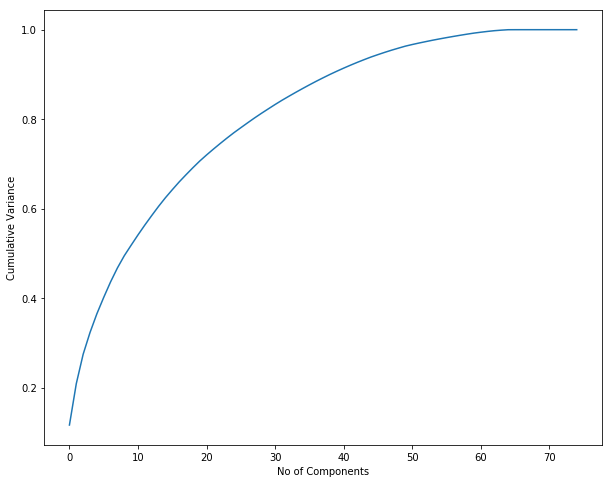

In [110]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('Cumulative Variance')
plt.show()

In [111]:
# get varian ratio to identify no.of columns for further analysis
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 11.66,  20.91,  27.48,  32.34,  36.52,  40.19,  43.65,  46.77,
        49.5 ,  51.85,  54.15,  56.36,  58.47,  60.52,  62.45,  64.23,
        65.97,  67.58,  69.14,  70.64,  72.01,  73.32,  74.59,  75.82,
        77.  ,  78.11,  79.21,  80.29,  81.32,  82.31,  83.29,  84.23,
        85.12,  85.99,  86.84,  87.67,  88.48,  89.25,  90.  ,  90.72,
        91.41,  92.07,  92.71,  93.32,  93.91,  94.44,  94.95,  95.43,
        95.88,  96.32,  96.68,  97.02,  97.34,  97.65,  97.94,  98.22,
        98.49,  98.75,  99.  ,  99.23,  99.43,  99.61,  99.77,  99.89,
        99.99, 100.  , 100.  , 100.  , 100.  , 100.  , 100.  , 100.  ,
       100.  , 100.  , 100.  ])

In [112]:
# Recreate models with 39 components with variance of 90%

pca_39 = PCA(n_components=39)

pca_39.fit(X_tr)

X_tr_pca_39 = pca.fit_transform(X_tr)
print(X_tr_pca_39.shape)

X_test_pca_39 = pca.transform(X_test)
print(X_test_pca_39.shape)


(33966, 75)
(7922, 75)


In [113]:
# Predict probabilities
lr_pca_39 = LogisticRegression(C=1e9)
lr_pca_39.fit(X_tr_pca_39, Y_tr)

Y_pred_39 = lr_pca.predict(X_test_pca_39)

confusion_matrix2 = confusion_matrix(Y_test, Y_pred_39)
print(confusion_matrix2)

[[5959 1287]
 [ 107  569]]


In [114]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(Y_test,Y_pred_39))

Logistic Regression accuracy with PCA:  0.8240343347639485


In [115]:
###OBSERVATIONS

# 1. 82% accuracy with default PCA
# 2. 90% vof ariance can be explained with 39 columns and maintain 82% accuracy
# 3. Key features obtained from PCA: - arpu_8 , onnet_mou_8 , offnet_mou_8 , roam_ic_mou_8 , roam_og_mou_8




## Decision Tree

In [116]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, Y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)
### Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(33966, 33)
[ 0  3  4  5  6  7 10 13 15 19 22 23 24 26 27 29 30 31 32 33 34 35 36 37
 40 49 52 57 62 64 67 69 74]


In [117]:
#feature vector for decision tree#feature 
lasso_features = list(df.columns[pos])
print("Features identified by LASSO for model buidling: ", lasso_features)

Features identified by LASSO for model buidling:  ['arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'total_og_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'vbc_3g_8', 'avg_arpu_67', 'avg_roam_ic_mou_67', 'avg_std_og_mou_67', 'avg_og_others_67', 'avg_loc_ic_mou_67', 'avg_isd_ic_mou_67', 'avg_total_rech_num_67', 'avg_vol_2g_mb_67', 'avg_monthly_2g_67', 'aon_mon']


In [118]:
X_tr_lasso = X_lasso
Y_tr_lasso = Y_tr

In [119]:
print ("Feature space holds %d observations and %d features" % X_tr_lasso.shape)
print ("Unique target labels:", np.unique(Y_tr))

Feature space holds 33966 observations and 33 features
Unique target labels: [0 1]


In [120]:
#decision tree with default hyperparameter

In [121]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_tr_lasso, Y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [122]:
# Let's check the evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test_lasso = pd.DataFrame(data=X_test).iloc[:, pos]
Y_pred_lasso = dt_default.predict(X_test_lasso)

# Printing classification report
print(classification_report(Y_test, Y_pred_lasso))

              precision    recall  f1-score   support

           0       0.97      0.88      0.93      7246
           1       0.37      0.75      0.50       676

    accuracy                           0.87      7922
   macro avg       0.67      0.81      0.71      7922
weighted avg       0.92      0.87      0.89      7922



In [123]:
# Printing confusion matrix and accuracy
print(confusion_matrix(Y_test, Y_pred_lasso))
print(accuracy_score(Y_test, Y_pred_lasso))

[[6395  851]
 [ 171  505]]
0.8709921736935118


In [124]:
#hyperparameter tuning

In [125]:
# Tuning max_depth

In [126]:
#GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                                random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                     cv=n_folds, 
                    return_train_score='warn',
                    scoring="accuracy")
tree.fit(X_tr_lasso, Y_tr_lasso)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None, param_grid={'max_depth': range(1, 40)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
             scoring

In [127]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.083145,0.001897,0.001630,0.000283,1,{'max_depth': 1},0.784074,0.781425,0.782602,0.793581,...,0.784549,0.004636,39,0.785073,0.786582,0.785625,0.783433,0.786009,0.785344,0.001075
1,0.125797,0.007874,0.001692,0.000478,2,{'max_depth': 2},0.810863,0.816014,0.815573,0.827150,...,0.818024,0.005493,38,0.821176,0.817091,0.819704,0.815338,0.818466,0.818355,0.002024
2,0.172676,0.002115,0.001596,0.000607,3,{'max_depth': 3},0.839123,0.862231,0.851928,0.859541,...,0.854825,0.008650,37,0.858089,0.854814,0.856212,0.854604,0.852690,0.855282,0.001797
3,0.220853,0.006378,0.001207,0.000193,4,{'max_depth': 4},0.848543,0.872829,0.861201,0.868227,...,0.863422,0.008322,36,0.872074,0.867327,0.870860,0.863031,0.868477,0.868354,0.003147
4,0.243913,0.021659,0.001102,0.000051,5,{'max_depth': 5},0.851928,0.881072,0.870032,0.878386,...,0.871489,0.010439,35,0.881385,0.876675,0.878404,0.875396,0.877088,0.877790,0.002038


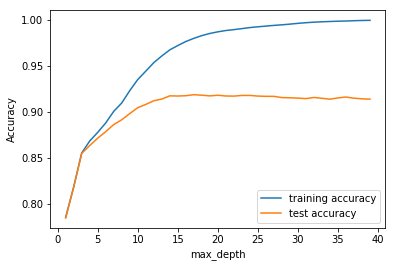

In [128]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_max_depth"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [129]:
#As the max_depth value is increased, both training and test score increase till max-depth = 10, after that test score is almost constant. Also, the scores are average accuracies across the 5-folds.

#So considering max_depth=13


In [130]:
#Tuning min_samples_leaf

In [131]:
#GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                                random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                     cv=n_folds, 
                    return_train_score='warn',
                    scoring="accuracy")
tree.fit(X_tr_lasso, Y_tr_lasso)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='wa

In [132]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.681049,0.032967,0.001749,0.000228,5,{'min_samples_leaf': 5},0.876214,0.918605,0.912864,0.918728,...,0.908909,0.016494,1,0.969675,0.966583,0.963970,0.963053,0.964267,0.965510,0.002385
1,0.535615,0.016941,0.001539,0.000063,25,{'min_samples_leaf': 25},0.862231,0.907565,0.894024,0.898852,...,0.895101,0.017696,2,0.927278,0.916642,0.917194,0.918819,0.922279,0.920442,0.003943
2,0.471483,0.020459,0.001857,0.000430,45,{'min_samples_leaf': 45},0.864881,0.898145,0.887989,0.893698,...,0.889654,0.013405,3,0.915244,0.902252,0.904203,0.904247,0.908515,0.906892,0.004651
3,0.458241,0.016770,0.001463,0.000067,65,{'min_samples_leaf': 65},0.859729,0.896968,0.884015,0.885895,...,0.883796,0.012890,4,0.905712,0.896658,0.898719,0.894936,0.895084,0.898222,0.003986
4,0.395099,0.007817,0.001483,0.000022,85,{'min_samples_leaf': 85},0.865764,0.893141,0.874154,0.885748,...,0.881823,0.010318,5,0.896474,0.888488,0.888525,0.891330,0.890594,0.891082,0.002920


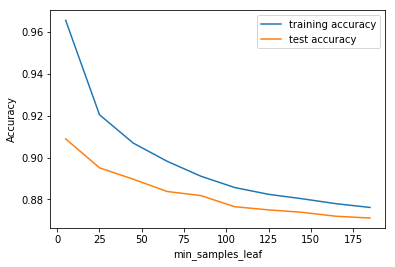

In [133]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [134]:
#Conclusion for min_samples_leaf: at low values of min_samples_leaf seems to be over-fit. 
#At values 125,the model becomes more stable and the training and test accuracy start to converge. 
#min_samples_leaf=125


In [135]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                                random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                     cv=n_folds, 
                    return_train_score='warn',
                   scoring="accuracy")
tree.fit(X_tr_lasso, Y_tr_lasso)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=100,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='w

In [136]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.723389,0.029443,0.001856,0.000253,5,{'min_samples_split': 5},0.880041,0.916544,0.922873,0.925501,...,0.913296,0.016882,1,0.994443,0.993228,0.993596,0.993229,0.993155,0.993530,0.000482
1,0.784701,0.051575,0.001957,0.000664,25,{'min_samples_split': 25},0.872093,0.908449,0.912128,0.918581,...,0.906141,0.017509,2,0.968423,0.960364,0.959922,0.960219,0.963384,0.962462,0.003233
2,0.695791,0.018035,0.001678,0.000163,45,{'min_samples_split': 45},0.871651,0.905946,0.908301,0.916519,...,0.903345,0.016308,3,0.952561,0.945164,0.947409,0.944984,0.949879,0.947999,0.002892
3,0.694687,0.021777,0.001648,0.000068,65,{'min_samples_split': 65},0.866353,0.903003,0.907418,0.914605,...,0.900636,0.017590,4,0.941852,0.934933,0.937472,0.935195,0.937955,0.937482,0.002492
4,0.675345,0.017861,0.001640,0.000023,85,{'min_samples_split': 85},0.864439,0.900059,0.901678,0.910336,...,0.897574,0.017170,5,0.934675,0.929192,0.931106,0.929087,0.932288,0.931270,0.002085


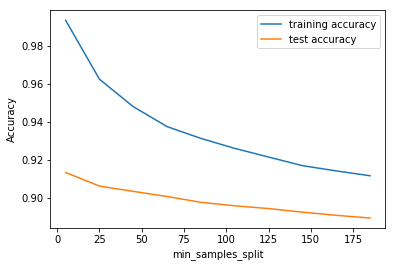

In [137]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [138]:
#As the min_samples_split increases, the tree overfits lesser since the model is less complex.

In [139]:
# Create the parameter grid 
param_grid = {
     'max_depth': range(5, 15, 5),
     'min_samples_leaf': range(50, 150, 50),
     'min_samples_split': range(50, 150, 50),
 'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

#Fit the grid search to the data
grid_search.fit(X_tr_lasso, Y_tr_lasso)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   26.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                      

In [140]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.280373,0.027388,0.001374,0.000180,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.845599,0.867972,0.861054,0.871761,0.871908,0.863658,0.009851,13
1,0.326195,0.005700,0.001938,0.000500,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.845599,0.867972,0.861054,0.871761,0.871908,0.863658,0.009851,13
2,0.275554,0.024163,0.001226,0.000097,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.847660,0.867530,0.858404,0.871466,0.870289,0.863069,0.008964,15
3,0.288823,0.033178,0.001231,0.000156,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.847660,0.867530,0.858404,0.871466,0.870289,0.863069,0.008964,15
4,0.489806,0.065665,0.001501,0.000195,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.862673,0.891816,0.886223,0.892079,0.898852,0.886328,0.012487,3


In [141]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8867985632691515
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [142]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                 max_depth=13, 
                                min_samples_leaf=25,
                               min_samples_split=45)
clf_gini.fit(X_tr_lasso, Y_tr_lasso)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=13,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=25, min_samples_split=45,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [143]:
# accuracy score
clf_gini.score(X_test_lasso,Y_test)

0.8698560969452158

In [ ]:
###OBSERVATIONS

# 1. 86.9% accuracy with Decision Tree
# 2. 33 Features were selected for Model Building
# 3. As per Confusion Matrix false postive still exists.

## Random Forest

In [144]:
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.

rfc = RandomForestClassifier()

rfc.fit(X_tr_lasso, Y_tr_lasso)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
# Making predictions
X_test_lasso = pd.DataFrame(data=X_test).iloc[:, pos]

predictions = rfc.predict(X_test_lasso)

In [146]:
# Classification report, confusion matrix and Accuracy
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7246
           1       0.55      0.65      0.60       676

    accuracy                           0.92      7922
   macro avg       0.76      0.80      0.78      7922
weighted avg       0.93      0.92      0.93      7922



In [147]:
print(confusion_matrix(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

[[6884  362]
 [ 236  440]]
0.924514011613229


In [149]:
## Hyperparameter Tuning

In [150]:
#Tuning max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Number of folds for k-fold CV
n_folds = 5

# Parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf, parameters, 
                     cv=n_folds, 
                    return_train_score='warn',
                    scoring="accuracy")
rf.fit(X_tr_lasso, Y_tr_lasso)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [151]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.128136,0.016716,0.005390,0.000246,2,{'max_depth': 2},0.805269,0.852811,0.826465,0.827739,...,0.830890,0.016086,4,0.817091,0.849477,0.831959,0.815375,0.840473,0.830875,0.013188
1,0.308378,0.007619,0.006930,0.000131,7,{'max_depth': 7},0.879894,0.901384,0.893435,0.905330,...,0.896602,0.009261,3,0.907920,0.902105,0.905013,0.902296,0.908147,0.905096,0.002611
2,0.467049,0.026482,0.009514,0.001578,12,{'max_depth': 12},0.915661,0.943038,0.931263,0.939929,...,0.932992,0.009558,2,0.965406,0.960364,0.957346,0.962611,0.957827,0.960711,0.003014
3,0.593860,0.045074,0.011521,0.001081,17,{'max_depth': 17},0.926847,0.952164,0.945540,0.952591,...,0.945622,0.009721,1,0.984727,0.983328,0.984175,0.984507,0.984986,0.984345,0.000574


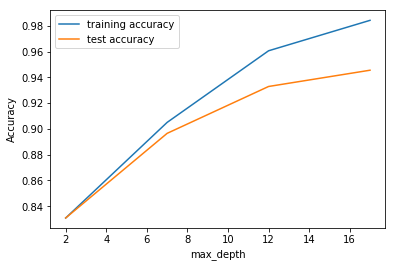

In [152]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_max_depth"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [153]:
## Tuning n_estimators

In [154]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# Number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

rf = RandomForestClassifier(max_depth=4)

rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    return_train_score='warn',
                    scoring="accuracy")
rf.fit(X_tr_lasso, Y_tr_lasso)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [155]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.123419,0.140107,0.041886,0.003094,100,{'n_estimators': 100},0.863115,0.880483,0.876214,0.886631,...,0.876818,0.007728,4,0.886538,0.877006,0.877742,0.877640,0.877824,0.879350,0.003605
1,9.864661,0.148982,0.186319,0.000433,500,{'n_estimators': 500},0.863703,0.880041,0.875331,0.886190,...,0.877377,0.007668,2,0.885654,0.878735,0.882084,0.876389,0.881247,0.880822,0.003135
2,17.412629,0.215932,0.345823,0.021914,900,{'n_estimators': 900},0.863262,0.880777,0.877245,0.886926,...,0.877466,0.007810,1,0.886059,0.879067,0.881643,0.878266,0.879922,0.880991,0.002771
3,25.727201,1.074309,0.481611,0.002719,1300,{'n_estimators': 1300},0.863703,0.878128,0.875184,0.887073,...,0.876906,0.007677,3,0.885544,0.878772,0.879766,0.878340,0.880032,0.880491,0.002602


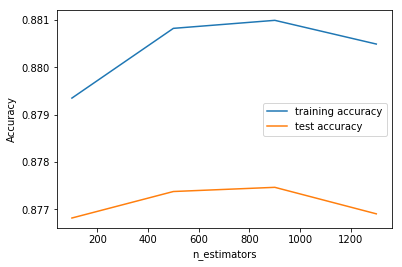

In [156]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [157]:
## Tuning max_features

In [158]:
X_tr_lasso.shape

(33966, 33)

In [167]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# Number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [1, 15]}
#parameters = {'max_features': range(0,56,5)}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score='warn',
                   scoring="accuracy")
rf.fit(X_tr_lasso, Y_tr_lasso)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [168]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.085943,0.015196,0.006012,0.000493,1,{'max_features': 1},0.818958,0.852517,0.838976,0.856449,...,0.833274,0.021388,2,0.825004,0.852090,0.840498,0.851108,0.810186,0.835777,0.016090
1,0.519678,0.022277,0.006038,0.000143,15,{'max_features': 15},0.858552,0.874448,0.867089,0.885159,...,0.872637,0.009137,1,0.878294,0.874356,0.874798,0.875248,0.876536,0.875846,0.001424


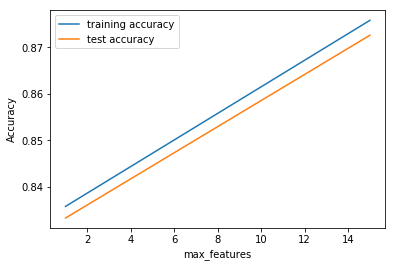

In [169]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
## Tuning min_samples_leaf

In [170]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# Number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                  return_train_score='warn',
                   scoring="accuracy")
rf.fit(X_tr_lasso, Y_tr_lasso)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [171]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.377957,0.015535,0.008411,0.000432,100,{'min_samples_leaf': 100},0.869885,0.889608,0.884898,0.897968,...,0.885945,0.009154,1,0.896769,0.887752,0.889555,0.890042,0.888938,0.890611,0.003173
1,0.384153,0.034701,0.009301,0.001370,150,{'min_samples_leaf': 150},0.867530,0.886076,0.877539,0.892373,...,0.881411,0.008416,2,0.889151,0.883446,0.882048,0.882572,0.884706,0.884384,0.002547
2,0.312416,0.005531,0.007817,0.000376,200,{'min_samples_leaf': 200},0.861201,0.883721,0.875773,0.892521,...,0.879585,0.010614,3,0.885765,0.878919,0.881680,0.881725,0.884338,0.882485,0.002372
3,0.341665,0.033075,0.009633,0.001301,250,{'min_samples_leaf': 250},0.862820,0.881366,0.873859,0.880889,...,0.874345,0.006747,4,0.883888,0.879692,0.878441,0.873445,0.877309,0.878555,0.003388
4,0.292665,0.004085,0.007492,0.000245,300,{'min_samples_leaf': 300},0.857521,0.875626,0.870474,0.881037,...,0.871577,0.007841,5,0.878441,0.870897,0.876343,0.872967,0.874696,0.874669,0.002614


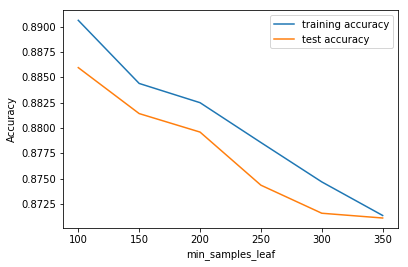

In [172]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [173]:
## Tuning min_samples_split

In [174]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# Number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                    return_train_score= 'warn',
                   scoring="accuracy")
rf.fit(X_tr_lasso, Y_tr_lasso)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [175]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.606334,0.048974,0.011292,0.001287,200,{'min_samples_split': 200},0.879747,0.905505,0.903003,0.910483,...,0.901401,0.011118,1,0.915869,0.909650,0.912447,0.908442,0.914771,0.912236,0.002855
1,0.505091,0.014124,0.008758,0.000098,250,{'min_samples_split': 250},0.881513,0.899470,0.895790,0.905330,...,0.896750,0.008223,2,0.911821,0.904902,0.905565,0.904394,0.906896,0.906716,0.002687
2,0.508385,0.035793,0.009238,0.001088,300,{'min_samples_split': 300},0.875920,0.900942,0.890197,0.901796,...,0.892981,0.009480,4,0.910643,0.900449,0.900596,0.899058,0.901781,0.902506,0.004160
3,0.468612,0.009874,0.008320,0.000043,350,{'min_samples_split': 350},0.873271,0.896674,0.896526,0.904152,...,0.893099,0.010422,3,0.908877,0.897026,0.905160,0.897365,0.898322,0.901350,0.004794
4,0.446964,0.008634,0.008148,0.000116,400,{'min_samples_split': 400},0.873418,0.895496,0.889167,0.903269,...,0.891480,0.010076,5,0.905454,0.896474,0.897100,0.896114,0.896960,0.898421,0.003534


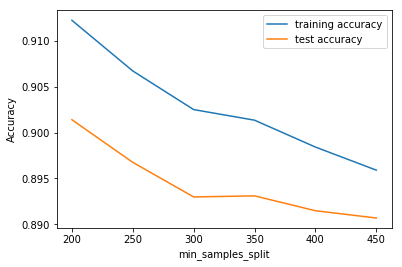

In [176]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [179]:
## Grid Search to Find Optimal Hyperparameters

In [186]:
# Creating the parameter grid based on the results of random search 
param_grid = {
   'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,900], 
    'max_features': [10,15,20]
}
# Creating a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_tr_lasso, Y_tr_lasso)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:  1.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [187]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8871224165341812 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200}


In [188]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

rfc.fit(X_tr_lasso,Y_tr_lasso)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [189]:
# prediction
predictions = rfc.predict(X_test_lasso)

In [190]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      7246
           1       0.41      0.80      0.54       676

    accuracy                           0.89      7922
   macro avg       0.70      0.85      0.74      7922
weighted avg       0.93      0.89      0.90      7922

[[6470  776]
 [ 135  541]]


In [ ]:
## Summary of LASSO and Random Forest

# 1. Getting approx. 92% accuracy by Random Forest 
# 2. Confusion matix clearly improved a lot, false positives still exist but reduced.
# 3. So most important features identifies by Random Forest are :- arpu_8 , onnet_mou_8 , offnet_mou_8 , roam_ic_mou_8 
#   , roam_og_mou_8



### Summary : Telecom Churn

In [ ]:
# As per above analysis 8 Month behaviour can be used as base for Churn Analysis
# arpu_8 ,  onnet_mou_8 , offnet_mou_8 , roam_ic_mou_8 , roam_og_mou_8 are the key indicators to predict churn
# Accuracy attained by 
#    RFE : 81 % 
#    PCA : 82 %
#    Decision Tree : 88 %
#    Random Forest : 92 %

# As compared to other models Random Forest gives more accuracy.
                        